In [236]:
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
df = pd.read_csv("survey_results_public.csv")
df.head()
df.shape

(89184, 84)

In [238]:
for col in df.columns:
    print(col)

ResponseId
Q120
MainBranch
Age
Employment
RemoteWork
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
LearnCodeCoursesCert
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
TechList
BuyNewTool
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
PlatformHaveWorkedWith
PlatformWantToWorkWith
WebframeHaveWorkedWith
WebframeWantToWorkWith
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
AISearchHaveWorkedWith
AISearchWantToWorkWith
AIDevHaveWorkedWith
AIDevWantToWorkWith
NEWSOSites
SOVisitFreq
SOAccount
SOPartFreq
SOComm
SOAI
AISelect
AISent
AIAcc
AIBen
AIToolInterested in Using
AIToolCurrently Using
AIToolNot interested in Using
AINextVery different
AINe

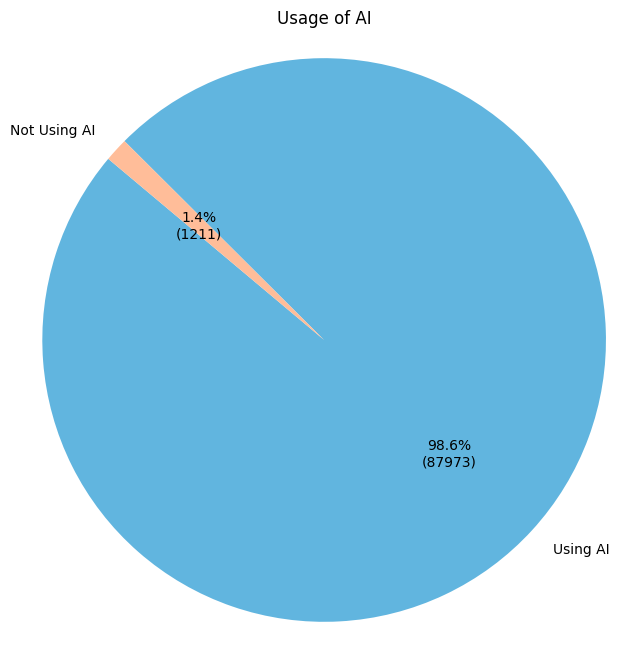

In [265]:
using_ai = df[df["AISelect"].notnull()]
not_using_ai = df[df["AISelect"].isnull()]

counts = [len(using_ai), len(not_using_ai)]
labels = ['Using AI', 'Not Using AI']
percentages = [round((count / len(df)) * 100, 1) for count in counts]


def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct=lambda pct: func(pct, counts), colors=["#61B5DF", "#FFBD99"], startangle=140)
plt.title('Usage of AI')
plt.axis('equal')  
plt.show()

In [257]:
using_ai["AIAcc"].value_counts()

AIAcc
nan                                                                                                                 49379
Increase productivity;Greater efficiency;Speed up learning                                                           6576
Increase productivity;Greater efficiency;Speed up learning;Improve accuracy in coding                                5252
Increase productivity;Greater efficiency                                                                             4877
Increase productivity;Speed up learning                                                                              4349
                                                                                                                    ...  
Other (please explain);Greater efficiency;Speed up learning;Improve collaboration                                       2
Other (please explain);Speed up learning;Improve accuracy in coding;Improve collaboration                               2
Other (please expl

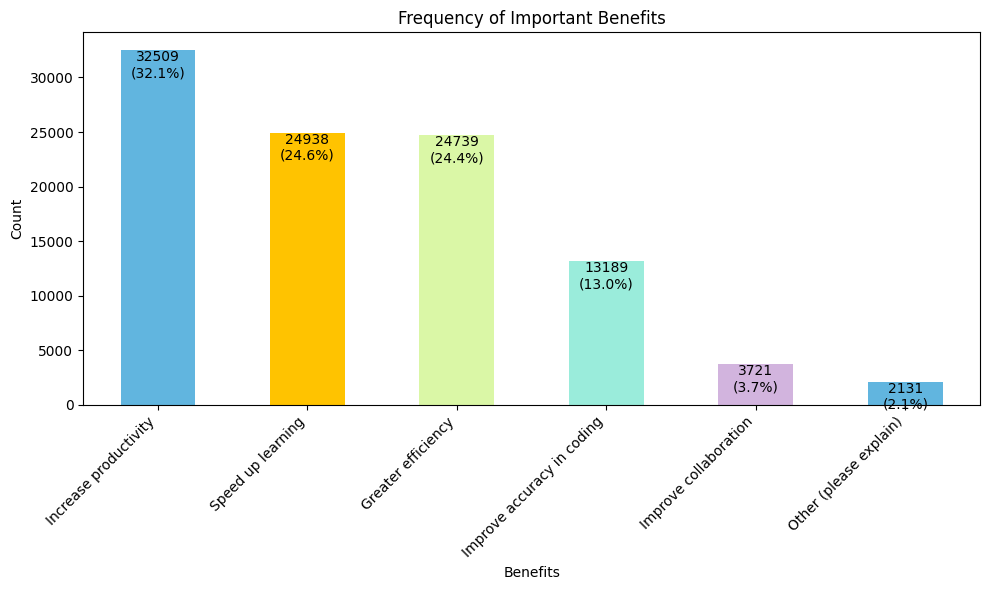

In [263]:
colors = ['#61B5DF', '#FFC300', '#DAF7A6', '#9AECDB', '#D2B4DE']


cleaned_data = using_ai.dropna(subset=['AIAcc'])

categories = cleaned_data['AIAcc'].str.split(';').explode()
categories = categories[categories != "nan"]


category_counts = categories.value_counts()



plt.figure(figsize=(10, 6))
ax  = category_counts.plot(kind='bar', color=colors)
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.title('Frequency of Important Benefits')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()


total = sum(category_counts)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({percentage:.1f}%)', (x, y), ha='center', va='top')

plt.show()





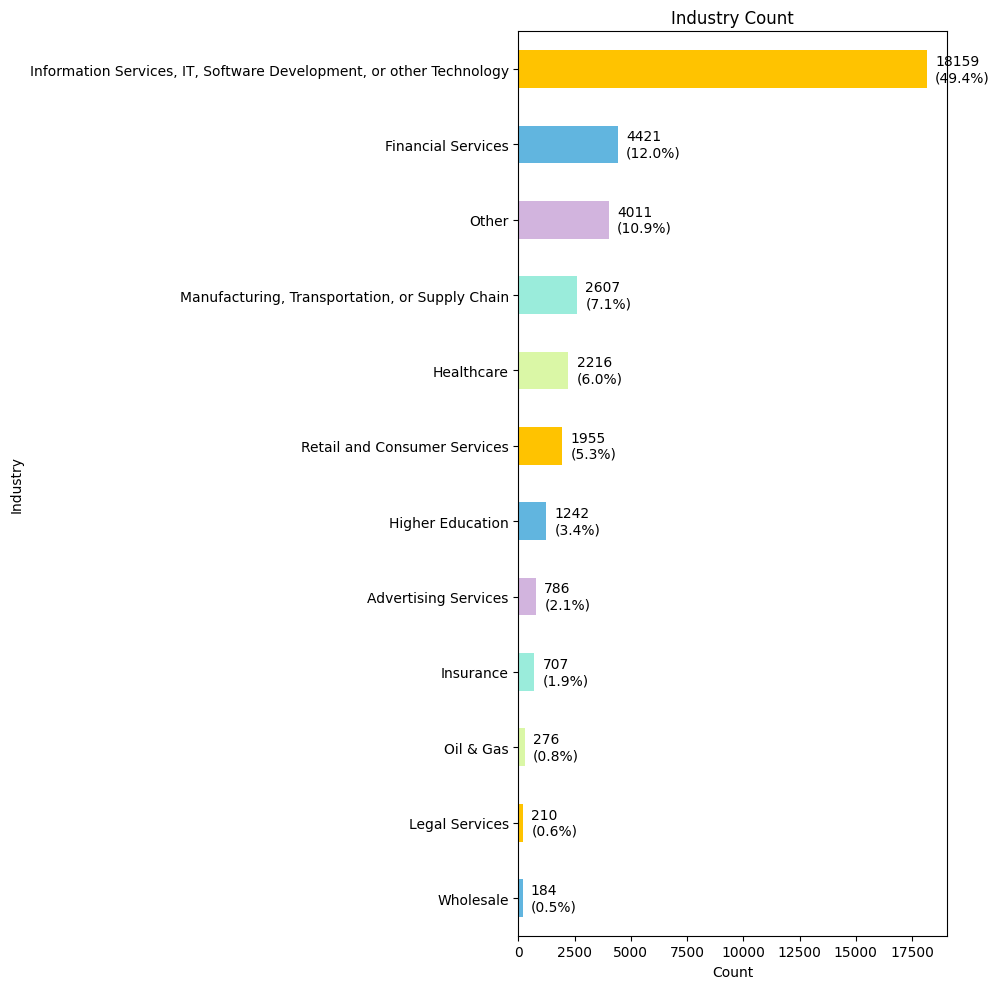

In [241]:

filtered_industy = using_ai[using_ai["Industry"].notnull()]

plt.figure(figsize=(10, 10))
ax = filtered_industy["Industry"].value_counts().sort_values().plot(kind="barh", color=colors)  # Changed to 'barh' for horizontal bar
plt.ylabel("Industry")
plt.xlabel("Count")
plt.title("Industry Count")


total = filtered_industy["Industry"].value_counts().sum()
for p in ax.patches:
    count = p.get_width()  
    percentage = 100 * count / total
    x = p.get_width() + (0.01 * total)  
    y = p.get_y() + p.get_height() / 2
    ax.annotate(f'{count}\n({percentage:.1f}%)', (x, y), ha='left', va='center') 

plt.tight_layout()
plt.show()


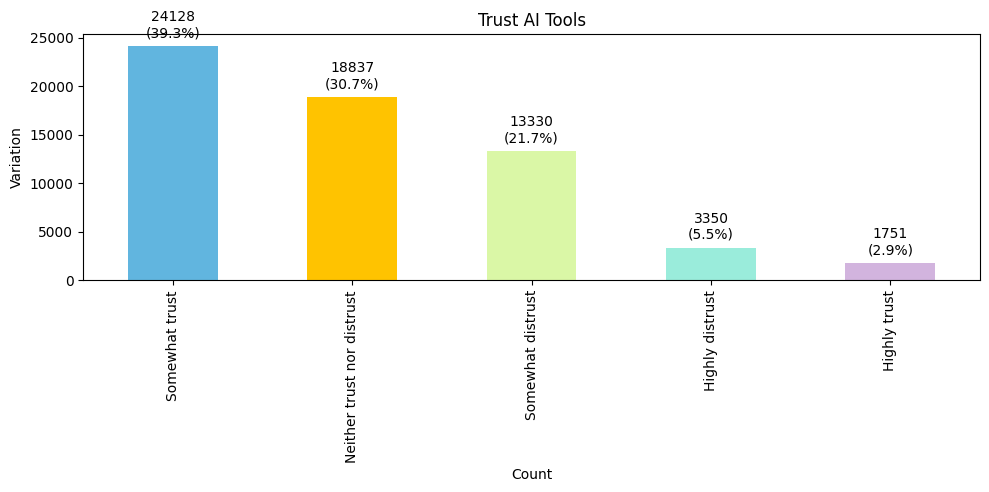

In [242]:

filtered_trust = using_ai[using_ai["AIBen"].notnull()]

plt.figure(figsize=(10, 5))
ax = filtered_trust["AIBen"].value_counts().sort_values(ascending=False).plot(kind="bar", color=colors)
plt.ylabel("Variation")
plt.xlabel("Count")
plt.title("Trust AI Tools")


total = filtered_trust["AIBen"].value_counts().sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + (0.01 * total)  
    ax.annotate(f'{count}\n({percentage:.1f}%)', (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

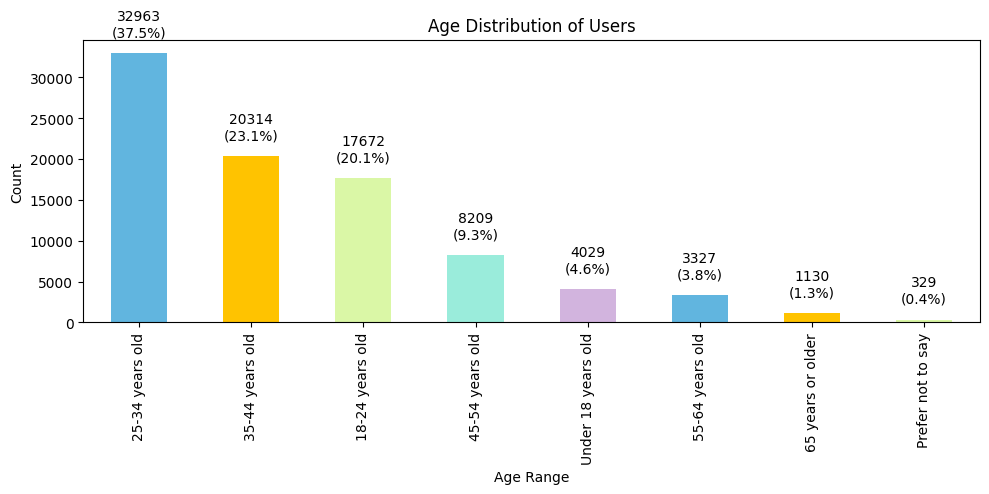

In [243]:

filtered_age = using_ai[using_ai["Age"].notnull()]



age_counts = filtered_age["Age"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = age_counts.plot(kind="bar", color=colors)
plt.ylabel("Count")
plt.xlabel("Age Range")
plt.title("Age Distribution of Users")



total = age_counts.sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom',
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()
